# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Reading & Displaying the csv file

In [2]:
titanic = pd.read_csv("titanic-passengers.csv",sep =";")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


# Getting more info on our raw data

In [3]:
titanic.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data Preprocessing :

Getting a summary about missing values :

In [4]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Filling missing values :

In [5]:
titanic['Age'].fillna(titanic['Age'].mean(),inplace=True) ###filling missing values
titanic['Cabin'].fillna('G6',inplace=True)
titanic['Embarked'].fillna('S',inplace=True)

Verifying that data is ready :

In [6]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

All we need now is some features that are more useful than others :

In [7]:
df = titanic.drop(['Name','SibSp','Parch','Ticket','Cabin','Embarked','PassengerId'],axis = 1)
df.head()

,Survived,Pclass,Sex,Age,Fare
0,No,2,male,28.0,13.0000
1,No,3,male,25.0,7.6500
2,No,3,male,20.0,7.8542
3,No,3,female,29.0,21.0750
4,No,1,male,31.0,52.0000


As we notice sex and survived columns are catigorical we need to convert it numerical :

In [8]:
df['Sex']=LabelEncoder().fit_transform(df['Sex'])
df['Survived']=LabelEncoder().fit_transform(df['Survived'])
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,2,1,28.0,13.0000
1,0,3,1,25.0,7.6500
2,0,3,1,20.0,7.8542
3,0,3,0,29.0,21.0750
4,0,1,1,31.0,52.0000


 # Importing libraries

In [9]:
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import graphviz

In [10]:
x = df.drop(["Survived"], axis=1)
y = df["Survived"]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

In [20]:
classifier = tree.DecisionTreeClassifier()  
classifier.fit(x_train, y_train)   
y_pred=classifier.predict(x_test)   
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.776536312849162


In [12]:
import graphviz

In [13]:
train_columns=['Pclass','Sex','Age','Fare']

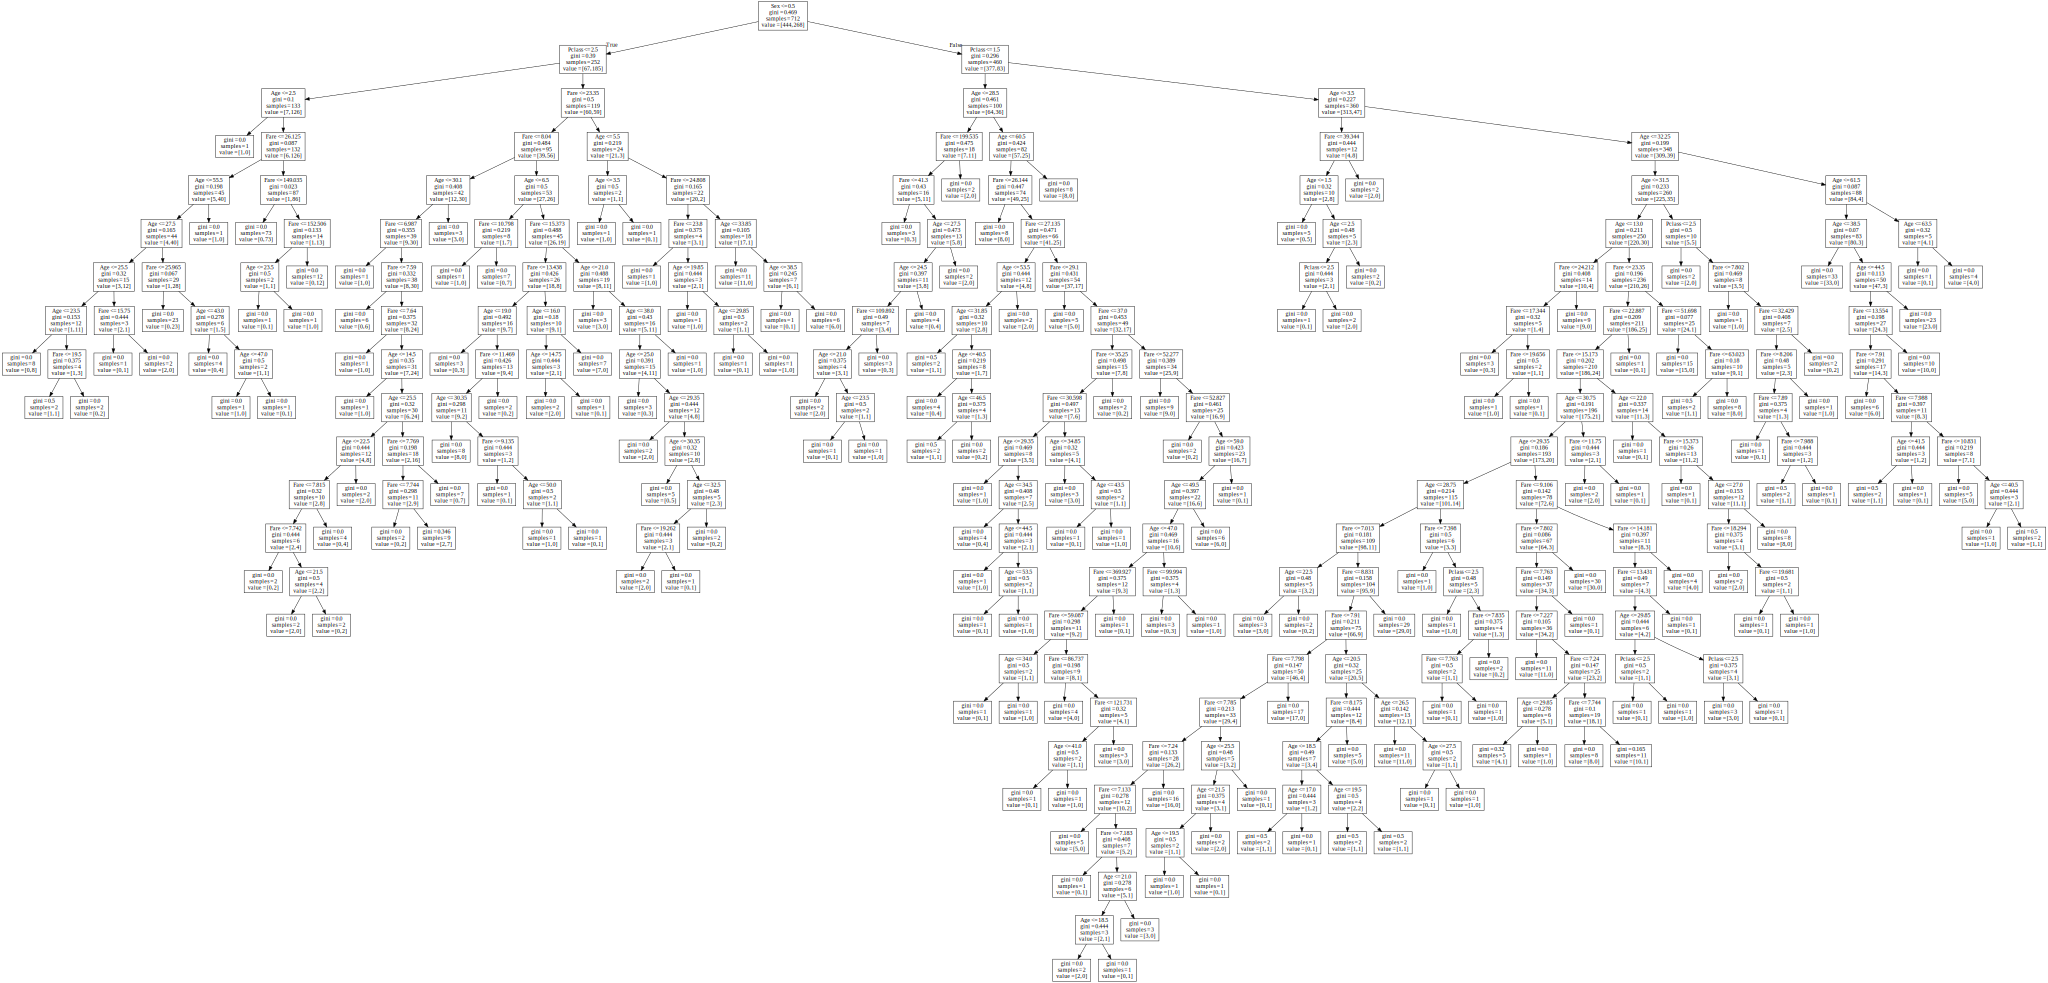

In [14]:
dot_data = tree.export_graphviz(classifier, out_file=None, feature_names = train_columns) 
graph = graphviz.Source(dot_data)
graph

for exemple passenger number 1 [2.5=>Pclass] [26.125=>Fare]  ..... probability of surviving = 0 and he didn't survive

# let's get to Pruning :

In [15]:
dtree = tree.DecisionTreeClassifier(criterion = "gini", splitter = 'random', max_leaf_nodes = 10, min_samples_leaf = 5, max_depth = 5)

In [22]:
dtree.fit(x_train, y_train)   
y_pred=dtree.predict(x_test)   
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7877094972067039


accuracy score is better after pruning which provides the tree from overfitting by reducing leaf nodes. 

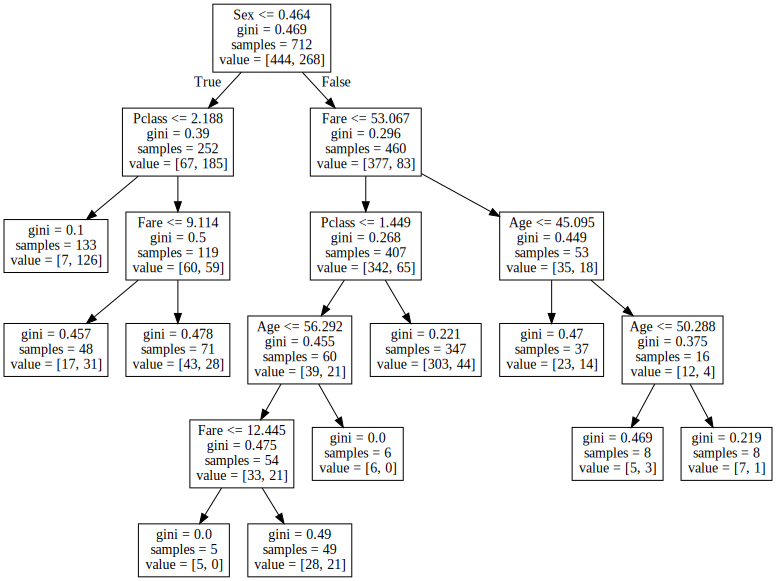

In [17]:
dot_data = tree.export_graphviz(dtree, out_file=None, feature_names = train_columns) 
graph = graphviz.Source(dot_data)
graph

 # Random forest :

In [23]:
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics  

classifier_2=RandomForestClassifier(n_estimators=10)  
classifier_2.fit(x_train, y_train)  
y_pred=classifier_2.predict(x_test)  
print("Accuracy with 10 estimators:", metrics.accuracy_score(y_test, y_pred))

Accuracy with 10 estimators: 0.8379888268156425


In [26]:
classifier_3=RandomForestClassifier(n_estimators=50)  
classifier_3.fit(x_train, y_train)  
y_pred=classifier_3.predict(x_test)  
print("Accuracy with 50 estimators:", metrics.accuracy_score(y_test, y_pred))

Accuracy with 50 estimators: 0.8435754189944135


we notice that the accuracy of the random forest with 50 estimators is better than the random forest with 10 estimators. overall random forest is way better than decision tree in terms of accuracy and performance. 